Imports and Installs

In [1]:
import form_funcs as f

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Opening the Data

In [2]:
df = pd.read_csv('go_form.csv')

Aparentemente, não há pessoas que conseguiram responder tudo com `NaN`s

In [3]:
columns = ['timestamp',
           'nome',
           'idade',
           'forca',
           'exp',
           'perc_temp',
           'go_rank',
           'cidade',
           'servidor',
           'horario',
           'lingua',
           'go_educ',
           'go_expec',
           'livros',
           'int_desloc',
           'int_desloc_dia',
           'int_desloc_loc',
           'int_desloc_tempo',
           'tempo_videos',
           'int_aulas',
           'int_aulas_valor',
           'importancia',
           'esporte',
           'int_comp',
           'ibero',
           'sugestoes']

In [4]:
df.columns = columns

In [5]:
df.head(2)

,timestamp,nome,idade,forca,exp,perc_temp,go_rank,cidade,servidor,horario,...,int_desloc_loc,int_desloc_tempo,tempo_videos,int_aulas,int_aulas_valor,importancia,esporte,int_comp,ibero,sugestoes
0,2019/02/24 9:02:25 pm GMT-3,Guilherme Martins,40,Avançado: 9 kyu a 1 kyu,15.0,0,1,São Paulo,OGS;WBaduk,Fim da noite,...,Bar;Perto de casa,15 min,0.0,Pagas,80,Progredir,Físicos,Depende,Talvez,Acredito que falte a comunidade gerar mais con...
1,2019/02/24 9:59:28 pm GMT-3,Marco Curvello,34,Avançado: 9 kyu a 1 kyu,12.0,3,1,Rio de Janeiro,KGS;OGS,Início da noite,...,Casa de alguém;Escola;Espaço Cultural ou Sesi;...,30 min,3.0,Gratuitas;Pagas,20,Divertir-se,Mentais,Sim,Talvez,NaN


# Setup

In [6]:
bins = 30

In [7]:
path_img = 'images/'

In [8]:
figsize = (7, 5)

In [9]:
title_font_size = 15

In [10]:
size_pie = (7, 7)

In [11]:
dpi = 200

# Informações Gerais

## Idade

In [12]:
stepper, bars = f.normed_hist(df['idade'], bins)

In [13]:
idade = df['idade']
idade_mean = idade.mean()

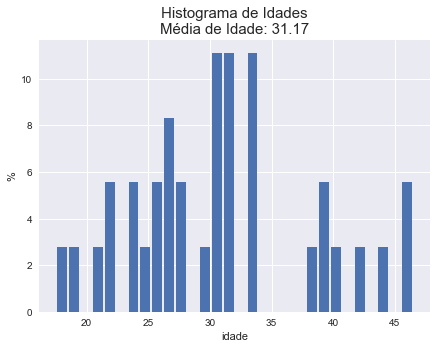

In [14]:
stepper, bars = f.normed_hist(df['idade'], bins)

f.plot_normed_hist(stepper,
                   bars,
                   figsize = figsize,
                   xlabel = 'idade',
                   ylabel = '%',
                   title = f'''Histograma de Idades\nMédia de Idade: {round(idade_mean, 2)}''',
                   fontsize = title_font_size,
                   path_img = path_img,
                   file_name = 'hist_idade.jpg',
                   dpi = dpi)

## Força

In [15]:
sizes = f.pie_sizes(df, 'forca')

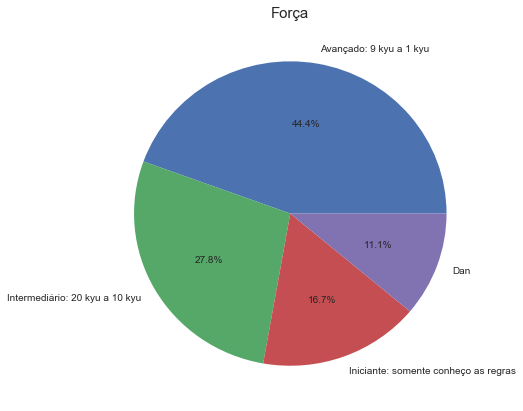

In [16]:
f.plot_pie(sizes = sizes,
           figsize = size_pie,
           title = 'Força',
           fontsize = title_font_size,
           path_img = path_img,
           file_name = 'pie_forca.jpg',
           dpi = dpi)

## Experiência

In [17]:
stepper, bars = f.normed_hist(df['exp'], bins)

In [18]:
exp = df['exp']
exp_mean = exp.mean()

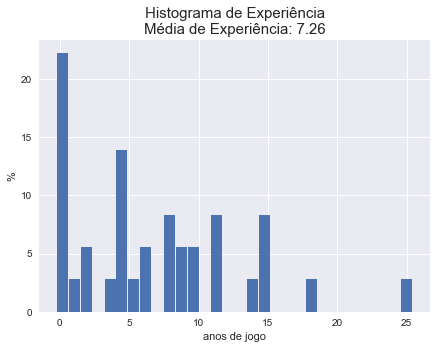

In [19]:
f.plot_normed_hist(stepper,
                   bars,
                   figsize = figsize,
                   xlabel = 'anos de jogo',
                   ylabel = '%',
                   title = f'Histograma de Experiência\nMédia de Experiência: {round(exp_mean, 2)}',
                   fontsize = title_font_size,
                   path_img = path_img,
                   file_name = 'hist_exp.jpg',
                   dpi = dpi)

## Percentual de Tempo que Go toma da Vida

In [20]:
stepper, bars = f.normed_hist(df['perc_temp'], 100)

In [21]:
perc_temp = df['perc_temp']
perc_temp_mean = perc_temp.mean()

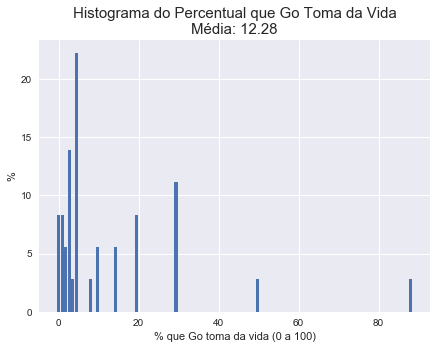

In [22]:
f.plot_normed_hist(stepper,
                   bars,
                   figsize = figsize,
                   xlabel = '% que Go toma da vida (0 a 100)',
                   ylabel = '%',
                   title = f'Histograma do Percentual que Go Toma da Vida\nMédia: {round(perc_temp_mean, 2)}',
                   fontsize = title_font_size,
                   path_img = path_img,
                   file_name = 'hist_perc_temp.jpg',
                   dpi = dpi)

## Posição do Go em relação a Outros Jogos

In [23]:
stepper, bars = f.normed_hist(df['go_rank'], 100)

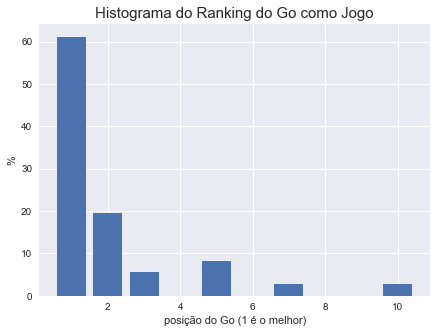

In [24]:
f.plot_normed_hist(stepper,
                   bars,
                   figsize = figsize,
                   xlabel = 'posição do Go (1 é o melhor)',
                   ylabel = '%',
                   title = 'Histograma do Ranking do Go como Jogo',
                   fontsize = title_font_size,
                   path_img = path_img,
                   file_name = 'hist_go_rank.jpg',
                   dpi = dpi)

## Residência: Cidade

In [25]:
sizes = f.pie_sizes(df, 'cidade')

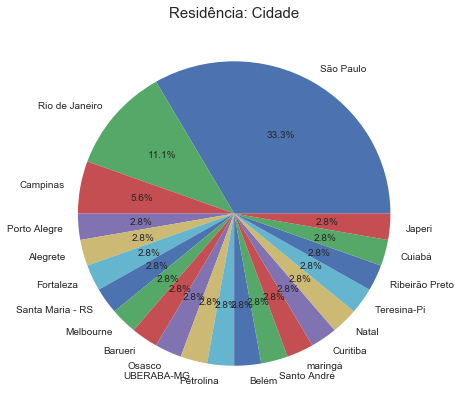

In [26]:
f.plot_pie(sizes = sizes,
           figsize = size_pie,
           title = 'Residência: Cidade',
           fontsize = title_font_size,
           path_img = path_img,
           file_name = 'pie_cidade.jpg',
           dpi = dpi)

## Servidores Mais Utilizados

In [27]:
s, l = f.split_unique_plus_stats(df, 'servidor')

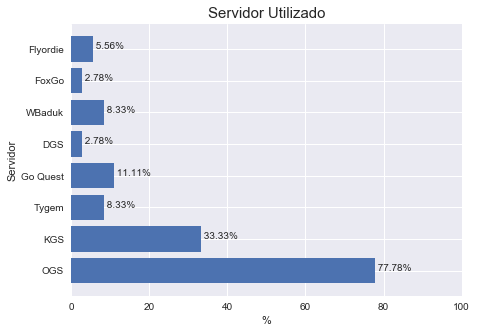

In [28]:
f.plot_sups(size_figure = figsize,
            s = s, l = l,
            xlabel = '%',
            ylabel = 'Servidor',
            title = 'Servidor Utilizado',
            title_font_size = title_font_size,
            path = path_img,
            file_name = 'mult_hist_servidor.jpg')

## Horário de Jogo

In [29]:
s, l = f.split_unique_plus_stats(df, 'horario')

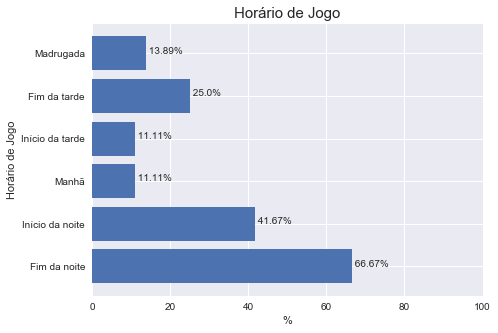

In [30]:
f.plot_sups(size_figure = figsize,
            s = s, l = l,
            xlabel = '%',
            ylabel = 'Horário de Jogo',
            title = 'Horário de Jogo',
            title_font_size = title_font_size,
            path = path_img,
            file_name = 'mult_hist_horario.jpg')

## Habilidades em Outras Línguas

In [31]:
s, l = f.split_unique_plus_stats(df, 'lingua')

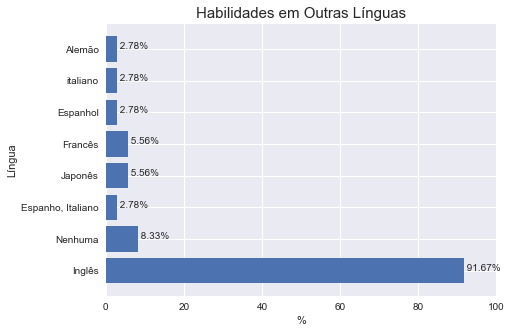

In [32]:
f.plot_sups(size_figure = figsize,
            s = s, l = l,
            xlabel = '%',
            ylabel = 'Língua',
            title = 'Habilidades em Outras Línguas',
            title_font_size = title_font_size,
            path = path_img,
            file_name = 'mult_hist_lingua.jpg')

## Go Ajuda Educacionalmente?

In [33]:
sizes = f.pie_sizes(df, 'go_educ')

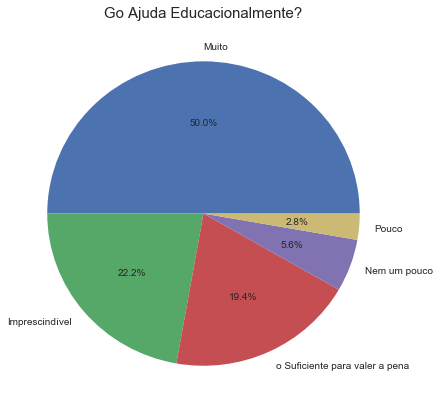

In [34]:
f.plot_pie(sizes = sizes,
           figsize = size_pie,
           title = 'Go Ajuda Educacionalmente?',
           fontsize = title_font_size,
           path_img = path_img,
           file_name = 'pie_go_educ.jpg',
           dpi = dpi)

## Expectativas sobre as Partidas

In [35]:
sizes = f.pie_sizes(df, 'go_expec')

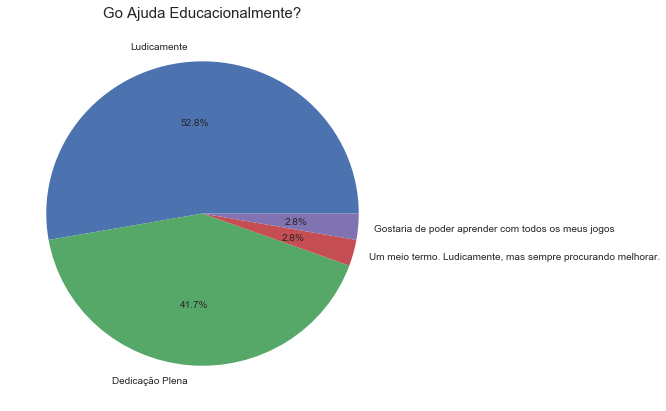

In [36]:
f.plot_pie(sizes = sizes,
           figsize = size_pie,
           title = 'Go Ajuda Educacionalmente?',
           fontsize = title_font_size,
           path_img = path_img,
           file_name = 'pie_go_expec.jpg',
           dpi = dpi)

## Número de Livros de Go

In [37]:
stepper, bars = f.normed_hist(df['livros'], bins)

In [38]:
livros = df['livros']
livros_mean = livros.mean()

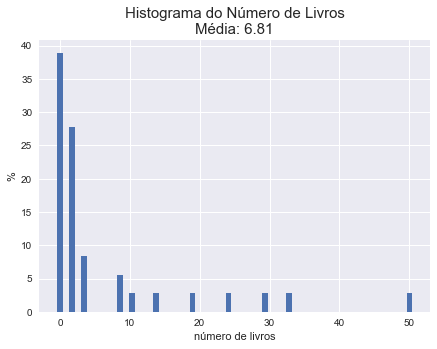

In [39]:
f.plot_normed_hist(stepper,
                   bars,
                   figsize = figsize,
                   xlabel = 'número de livros',
                   ylabel = '%',
                   title = f'Histograma do Número de Livros\nMédia: {round(livros_mean, 2)}',
                   fontsize = title_font_size,
                   path_img = path_img,
                   file_name = 'hist_livros.jpg',
                   dpi = dpi)

# Interesses

## Deslocamento para Jogar ao Vivo

In [40]:
sizes = f.pie_sizes(df, 'int_desloc')

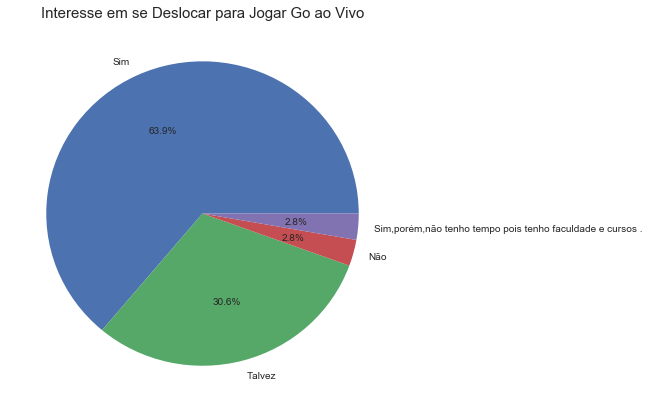

In [41]:
f.plot_pie(sizes = sizes,
           figsize = size_pie,
           title = 'Interesse em se Deslocar para Jogar Go ao Vivo',
           fontsize = title_font_size,
           path_img = path_img,
           file_name = 'pie_int_desloc.jpg',
           dpi = dpi)

### Em qual Dia da Semana?

In [42]:
s, l = f.split_unique_plus_stats(df, 'int_desloc_dia')

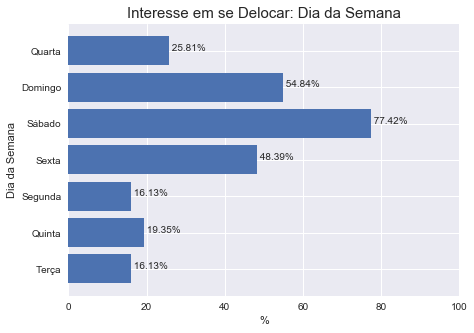

In [43]:
f.plot_sups(size_figure = figsize,
            s = s, l = l,
            xlabel = '%',
            ylabel = 'Dia da Semana',
            title = 'Interesse em se Delocar: Dia da Semana',
            title_font_size = title_font_size,
            path = path_img,
            file_name = 'mult_hist_int_desloc_dia.jpg')

### Onde?

In [44]:
s, l = f.split_unique_plus_stats(df, 'int_desloc_loc')

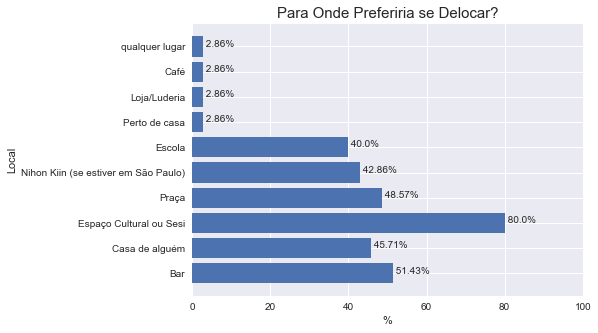

In [45]:
f.plot_sups(size_figure = figsize,
            s = s, l = l,
            xlabel = '%',
            ylabel = 'Local',
            title = 'Para Onde Preferiria se Delocar?',
            title_font_size = title_font_size,
            path = path_img,
            file_name = 'mult_hist_int_desloc_loc.jpg')

### Tempo Máximo de Deslocamento?

In [46]:
sizes = f.pie_sizes(df, 'int_desloc_tempo')

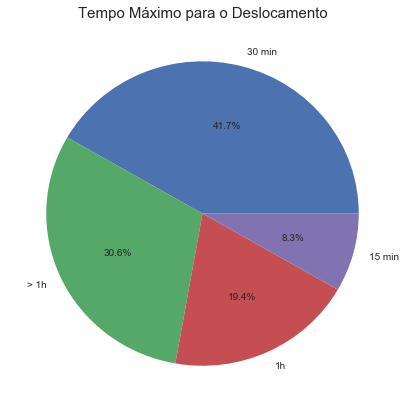

In [47]:
f.plot_pie(sizes = sizes,
           figsize = size_pie,
           title = 'Tempo Máximo para o Deslocamento',
           fontsize = title_font_size,
           path_img = path_img,
           file_name = 'pie_int_desloc_tempo.jpg',
           dpi = dpi)

## Tempo Gasto com Vídeos de Go

In [48]:
stepper, bars = f.normed_hist(df['tempo_videos'], 100)

In [49]:
tempo_videos = df['tempo_videos']
tempo_videos_mean = tempo_videos.mean()

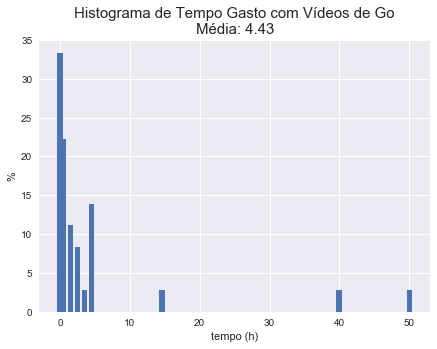

In [50]:
f.plot_normed_hist(stepper,
                   bars,
                   figsize = figsize,
                   xlabel = 'tempo (h)',
                   ylabel = '%',
                   title = f'Histograma de Tempo Gasto com Vídeos de Go\nMédia: {round(tempo_videos_mean, 2)}',
                   fontsize = title_font_size,
                   path_img = path_img,
                   file_name = 'hist_tempo_videos.jpg',
                   dpi = dpi)

## Aulas de Go

In [51]:
s, l = f.split_unique_plus_stats(df, 'int_aulas')

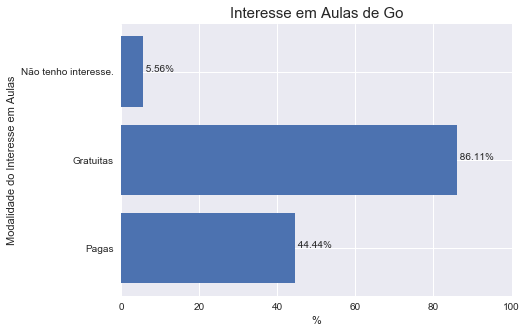

In [52]:
f.plot_sups(size_figure = figsize,
            s = s, l = l,
            xlabel = '%',
            ylabel = 'Modalidade do Interesse em Aulas',
            title = 'Interesse em Aulas de Go',
            title_font_size = title_font_size,
            path = path_img,
            file_name = 'mult_hist_int_aulas.jpg')

### Quanto Pagaria nas Aulas?

In [53]:
stepper, bars = f.normed_hist(df['int_aulas_valor'], 100)

In [54]:
valor = df['int_aulas_valor']

In [55]:
media_nz = valor[valor != 0].mean()

In [56]:
media = valor.mean()

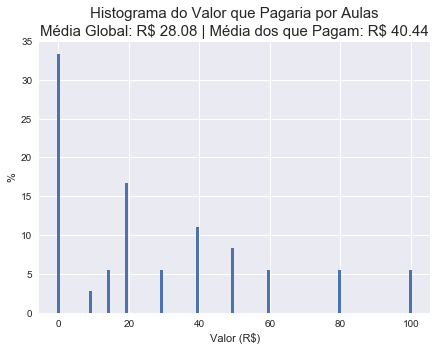

In [57]:
f.plot_normed_hist(stepper,
                   bars,
                   figsize = figsize,
                   xlabel = 'Valor (R$)',
                   ylabel = '%',
                   title = f'''Histograma do Valor que Pagaria por Aulas\nMédia Global: R\$ {round(media, 2)} | Média dos que Pagam: R\$ {round(media_nz, 2)}''',
                   fontsize = title_font_size,
                   path_img = path_img,
                   file_name = 'hist_int_aulas_valor.jpg',
                   dpi = dpi)

## Faceta Mais Importante do Jogo

In [58]:
sizes = f.pie_sizes(df, 'importancia')

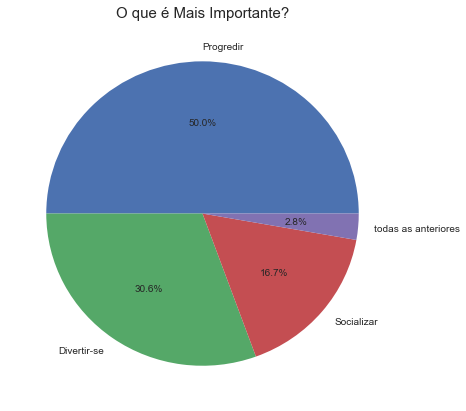

In [59]:
f.plot_pie(sizes = sizes,
           figsize = size_pie,
           title = 'O que é Mais Importante?',
           fontsize = title_font_size,
           path_img = path_img,
           file_name = 'pie_importancia.jpg',
           dpi = dpi)

## Esportes Mentais ou Físicos?

In [60]:
sizes = f.pie_sizes(df, 'esporte')

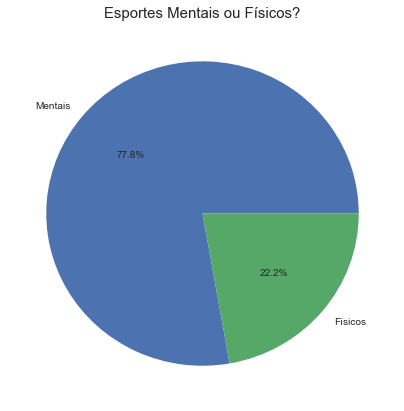

In [61]:
f.plot_pie(sizes = sizes,
           figsize = size_pie,
           title = 'Esportes Mentais ou Físicos?',
           fontsize = title_font_size,
           path_img = path_img,
           file_name = 'pie_esportes.jpg',
           dpi = dpi)

## Competições e Eventos de Go

In [62]:
sizes = f.pie_sizes(df, 'int_comp')

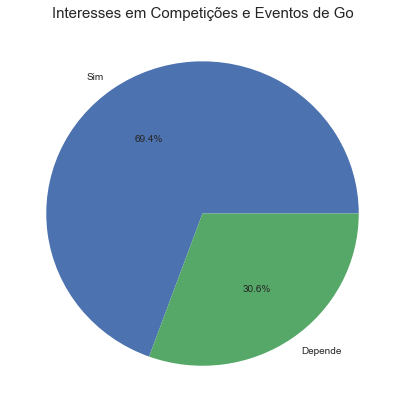

In [63]:
f.plot_pie(sizes = sizes,
           figsize = size_pie,
           title = 'Interesses em Competições e Eventos de Go',
           fontsize = title_font_size,
           path_img = path_img,
           file_name = 'pie_int_comp.jpg',
           dpi = dpi)

## Pretende Participar do Torneio Iberoamericano deste Ano?

In [64]:
sizes = f.pie_sizes(df, 'ibero')

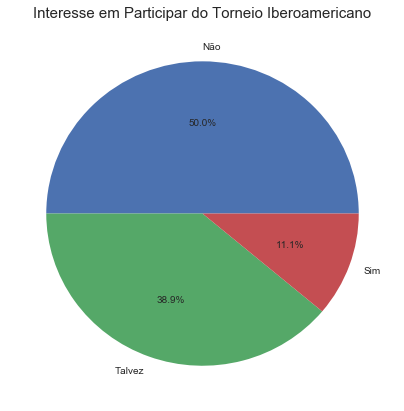

In [65]:
f.plot_pie(sizes = sizes,
           figsize = size_pie,
           title = 'Interesse em Participar do Torneio Iberoamericano',
           fontsize = title_font_size,
           path_img = path_img,
           file_name = 'pie_ibero.jpg',
           dpi = dpi)